In [1]:
import sqlite3

In [2]:
# ver = "v1.0.0"

# ns = range(4, 300)
# """the range of n to calculate within current run"""

# min_min_count = 10
# """
# this value determines the minimum occurence of a minimum solution
# before it is deemed as a global minimum
# """

# max_task_queue_length = 32768

# out_base_path = f"out/{ver}/min_potential"

# sqlite3_db_path = f"{out_base_path}/db.sqlite3"

# solver_path = f"release/{ver}/solver/SolverMinPotentialNaive.o3.out"

# txt_dump_path = f"{out_base_path}/txt_dump/"

# con = sqlite3.connect(sqlite3_db_path)
# cur = con.cursor()


In [3]:
import tqdm

def get_status(
  cur: sqlite3.Cursor,
  ns=None,
  gen_missed_tasks=False
):
  print("get_status")

  total_cnts = {}
  min_cnts = {}
  min_vals = {}
  min_val_seeds = {}

  missed_tasks = []

  if not ns:
    ns = [n[0] for n in cur.execute("SELECT DISTINCT n FROM record;").fetchall()]
  for n in tqdm.tqdm(ns):
    total_cnt_n = cur.execute(f"SELECT COUNT(n) FROM record WHERE n={n};").fetchone()[0]
    total_cnts[n] = total_cnt_n
    if total_cnt_n == 0:
      continue
    min_val_n = cur.execute(f"SELECT MIN(value) FROM record WHERE n={n};").fetchone()[0]
    rounded_min_val_n = round(min_val_n, 7)
    min_vals[n] = rounded_min_val_n
    min_cnts[n] = cur.execute(f"SELECT COUNT(n) FROM record WHERE n={n} AND value<{min_val_n+1e-7};").fetchone()[0]
    # min_cnts[n] = cur.execute(f"SELECT COUNT(n) FROM record WHERE n={n} AND ROUND(value, 7)={rounded_min_val_n};").fetchone()[0]
    min_val_seeds[n] = cur.execute(f"SELECT seed FROM record WHERE n={n} AND value={min_val_n};").fetchone()[0]
    if gen_missed_tasks:
      max_seed_n = cur.execute(f"SELECT MAX(seed) FROM record WHERE n={n}").fetchone()[0]
      if max_seed_n != total_cnt_n-1:
        missed_tasks_cnt_n = max_seed_n + 1 - total_cnt_n
        print(f"missing record of n={n}: {missed_tasks_cnt_n}")
        seed = total_cnt_n-1
        pbar = tqdm.tqdm(total=missed_tasks_cnt_n)
        while missed_tasks_cnt_n != 0:
          if cur.execute(f"SELECT 1 FROM record WHERE n={n} AND seed={seed};").fetchone() is None:
            missed_tasks_cnt_n -= 1
            missed_tasks.append((n, seed, ""))
            pbar.update(1)
          seed -= 1
  
  return total_cnts, min_cnts, min_vals, min_val_seeds, missed_tasks

In [4]:
import tqdm
import os
import numpy as np


ns = range(4,300)
ver = "v1.0.0"
out_base_path = f"out/{ver}/min_potential"
sqlite3_db_path = f"{out_base_path}/db.sqlite3"
con = sqlite3.connect(sqlite3_db_path)
cur = con.cursor()
total_cnts, min_cnts, min_vals, min_val_seeds, missed_tasks = get_status(cur)


get_status


100%|██████████| 297/297 [00:52<00:00,  5.62it/s]  


100%|██████████| 296/296 [00:08<00:00, 33.63it/s]  


<BarContainer object of 296 artists>

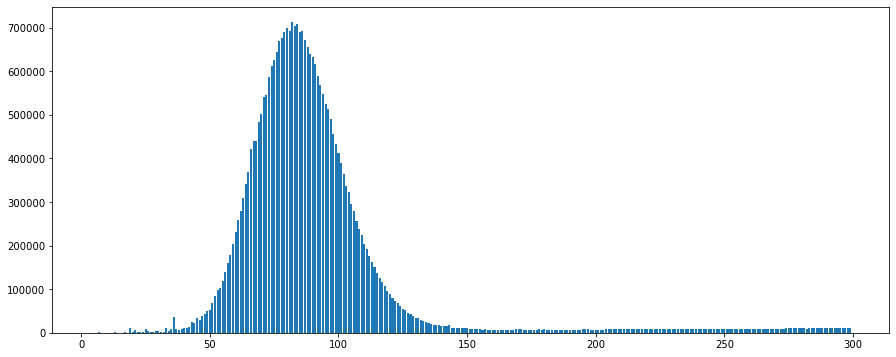

In [5]:
# %%
import matplotlib.pyplot as plt
import numpy as np
avg_steps = {}
for n in tqdm.tqdm(ns):
  avg_steps[n] = cur.execute(f"SELECT AVG(step) FROM record WHERE n={n};").fetchone()[0]
x = list(avg_steps.keys())
y = np.array(list(avg_steps.values()))
plt.figure(figsize=(15,6))
plt.bar(
  x,
  y,
)

100%|██████████| 296/296 [00:00<00:00, 2076110.34it/s]


<BarContainer object of 296 artists>

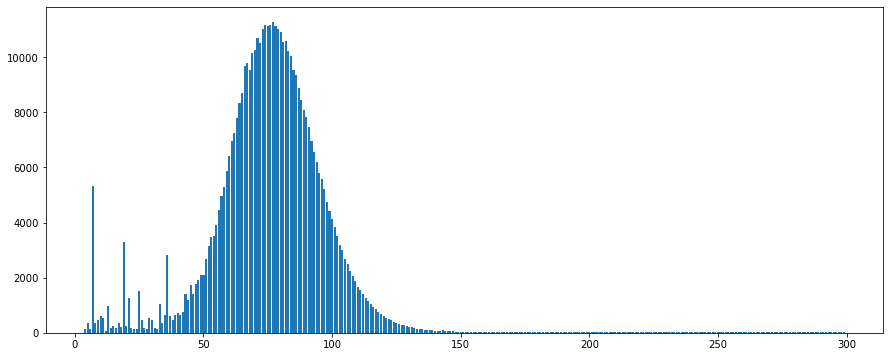

In [6]:
# %%
avg_distances = {}
for n in tqdm.tqdm(ns):
  avg_distances[n] = avg_steps[n] * 100/n/n
x = list(avg_distances.keys())
y = np.array(list(avg_distances.values()))
plt.figure(figsize=(15,6))
plt.bar(
  x,
  y,
)

100%|██████████| 296/296 [00:00<00:00, 1532733.31it/s]


<BarContainer object of 296 artists>

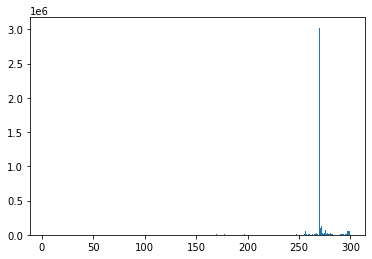

In [7]:
# %%
import matplotlib.pyplot as plt
import numpy as np
avg_retries = {}

for n in tqdm.tqdm(ns):
  avg_retries[n] = total_cnts[n]/min_cnts[n]
x = list(avg_retries.keys())
y = np.array(list(avg_retries.values()))
plt.figure()
plt.bar(
  x,
  y,
)

In [8]:
ver = "v1.0.2"

ns = range(4, 300)
"""the range of n to calculate within current run"""

min_min_count = 10
"""
this value determines the minimum occurence of a minimum solution
before it is deemed as a global minimum
"""

max_task_queue_length = 32768

out_base_path = f"out/{ver}/min_potential"

sqlite3_db_path = f"{out_base_path}/db.sqlite3"

solver_path = f"release/{ver}/solver/SolverMinPotentialNaive.o3.out"

txt_dump_path = f"{out_base_path}/txt_dump/"

con = sqlite3.connect(sqlite3_db_path)
cur = con.cursor()


In [9]:
total_cnts_1_0_2, min_cnts_1_0_2, min_vals_1_0_2, min_val_seeds_1_0_2, missed_tasks_1_0_2 = get_status(cur)

get_status


100%|██████████| 296/296 [00:20<00:00, 14.11it/s]  


100%|██████████| 296/296 [00:00<00:00, 2201265.93it/s]


<BarContainer object of 296 artists>

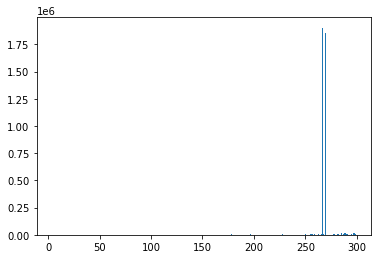

In [10]:
# %%
import matplotlib.pyplot as plt
import numpy as np
avg_retries = {}

ns = range(4,300)
for n in tqdm.tqdm(ns):
  avg_retries[n] = total_cnts_1_0_2[n]/min_cnts_1_0_2[n]
x = list(avg_retries.keys())
y = np.array(list(avg_retries.values()))
plt.figure()
plt.bar(
  x,
  y,
)

In [11]:
diff = {}
for n in ns:
  diff[n] = min_vals_1_0_2[n]-min_vals[n]
diff

{4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 9.999996564147295e-08,
 34: 0.0,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.0,
 50: 0.0,
 51: 0.0,
 52: 0.0,
 53: 0.0,
 54: 0.0,
 55: 0.0,
 56: 0.0,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 0.0,
 61: 0.0,
 62: 0.0,
 63: 0.0,
 64: 0.0,
 65: 0.0,
 66: 0.0,
 67: 0.0,
 68: 0.0,
 69: 0.0,
 70: 0.0,
 71: 0.0,
 72: 0.0,
 73: 0.0,
 74: 0.0,
 75: 0.0,
 76: 0.0,
 77: 0.0,
 78: 0.0,
 79: 0.0,
 80: 0.0,
 81: 0.0,
 82: 0.0,
 83: 0.0,
 84: 0.0,
 85: 0.0,
 86: 0.0,
 87: 0.0,
 88: 0.0,
 89: 0.0,
 90: 0.0,
 91: 0.0,
 92: 0.0,
 93: 0.0,
 94: 0.0,
 95: 0.0,
 96: 0.0,
 97: 0.0,
 98: 0.0,
 99: 0.0,
 100: 0.0,
 101: 0.0,
 102: 

<BarContainer object of 289 artists>

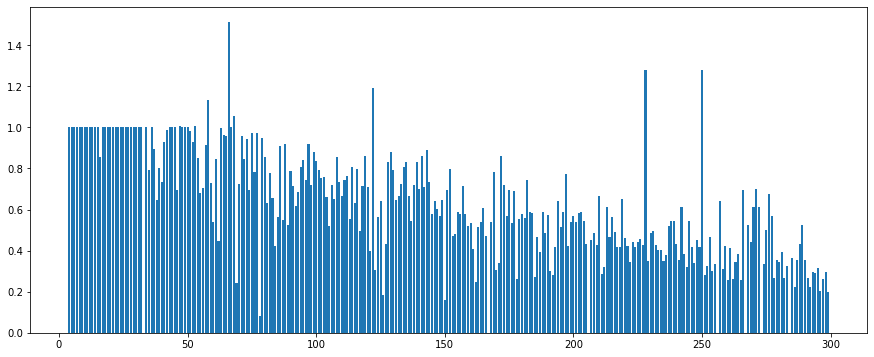

In [12]:
retry_ratio = {}
for n in ns:
  if diff[n] == 0:
    retry_ratio[n] = (total_cnts_1_0_2[n]/min_cnts_1_0_2[n]) / (total_cnts[n]/min_cnts[n])
retry_ratio

x = list(retry_ratio.keys())
y = np.array(list(retry_ratio.values()))
plt.figure(figsize=(15,6))
plt.bar(
  x,
  y,
)

In [13]:
avg_retry_ratio = np.average(list(retry_ratio.values()))
avg_retry_ratio

0.6430376316219113

In [14]:
retry_ratio = {}
for n in ns:
  if diff[n] == 0 and n>250:
    retry_ratio[n] = (total_cnts_1_0_2[n]/min_cnts_1_0_2[n]) / (total_cnts[n]/min_cnts[n])
avg_retry_ratio = np.average(list(retry_ratio.values()))
avg_retry_ratio

0.38233854168892634

In [15]:
x = list(retry_ratio.keys())
y = list(retry_ratio.values())
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
-m, 1-c

(0.0027271412672374967, -0.13351445296467657)

In [16]:

# %%
cnt=0
for i, min_val in min_vals.items():
  txt_path = f"{txt_dump_path}/{i}.txt"

  if os.path.exists(txt_path):
    with open(txt_path, 'r') as f:
      lines = f.readlines()
    c_points = np.array(lines, dtype=float).reshape(-1,3)
    n = len(c_points)
    value = 0
    for i, cp_i in enumerate(c_points):
      for j in range(i+1, n):
        direction = cp_i - c_points[j]
        norm = np.linalg.norm(direction, 2)
        grad = direction/norm/norm/norm
        value += 1/norm
    # print(value)

    if (abs(min_val - value) > 0.0000001):
      print(i)
      cnt+=1
print(cnt)
# %%
import pickle
with open("out/min_potential/counter_bf.pickle", "rb") as f:
  counts = pickle.load(f)

total_cnts_sa = counts["total_cnts"]
min_cnts_sa = counts["min_cnts"]








266
1


FileNotFoundError: [Errno 2] No such file or directory: 'out/min_potential/counter_bf.pickle'

In [ ]:
# %% find appropriate batch_size
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
x = list(total_cnts.keys())
y = np.array(list(total_cnts.values()))/np.array(list(min_cnts.values()))
plt.figure()
plt.bar(
  x,
  y,
)
# %%
x_max = [4, 37, 78, 178, 248]
y_max = [1, 6, 117, 17800, 71548]
f = interp1d(x_max, y_max, kind='quadratic')
x_smooth = np.linspace(4, 248, 1000)
y_smooth = f(x_smooth)
plt.plot(x, y, 'ro', label='Data')
plt.plot(x_smooth, y_smooth, 'b-', label='Interpolated Curve')

# %%
from scipy.optimize import curve_fit
def polynomial_func(x, a, b):
    return a + b * x**4
params, _ = curve_fit(polynomial_func, x_max, y_max, sigma=np.square(x_max))
x_fit = np.linspace(4, 255, 1000)
y_fit = polynomial_func(x_fit, *params)
plt.plot(x, y, 'ro', label='Data')
plt.plot(x_fit, y_fit, 'b-', label='Interpolated Curve')